In [1]:
# Library import
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# COVID-19 Time 데이터셋 불러오기
time_df = pd.read_csv("../Data/COVID-19/Time.csv")

In [3]:
# COVID-19 Time 데이터셋 구성
time_df.describe()

,time,test,negative,confirmed,released,deceased
count,163.000000,1.630000e+02,1.630000e+02,163.000000,163.000000,163.000000
mean,4.122699,4.977797e+05,4.754839e+05,7834.865031,5604.312883,157.104294
std,7.019174,3.958830e+05,3.865611e+05,4666.040541,4544.317229,114.010916
min,0.000000,1.000000e+00,0.000000e+00,1.000000,0.000000,0.000000
25%,0.000000,9.648800e+04,5.877400e+04,3443.000000,29.000000,17.500000
50%,0.000000,5.030510e+05,4.773030e+05,10450.000000,7117.000000,208.000000
75%,16.000000,7.825585e+05,7.542225e+05,11116.000000,10100.500000,263.500000
max,16.000000,1.273766e+06,1.240157e+06,12800.000000,11537.000000,282.000000


In [4]:
# COVID-19 Time 데이터셋 데이터 타입 확인
time_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163 entries, 0 to 162
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   date       163 non-null    object
 1   time       163 non-null    int64 
 2   test       163 non-null    int64 
 3   negative   163 non-null    int64 
 4   confirmed  163 non-null    int64 
 5   released   163 non-null    int64 
 6   deceased   163 non-null    int64 
dtypes: int64(6), object(1)
memory usage: 9.0+ KB


Time.csv 데이터 파일은 다음과 같은 내용으로 구성되어 있다.

- 데이터셋 크기: 163개 (NULL 또는 NaN 데이터 없음)
    - date: 날짜
    - time: 파악 안됨
    - test: COVID-19 검사 수
    - negative: COVID-19 음성 결과 수
    - confirmed: COVID-19 양성 결과 수
    - release: COVID-19 완치자 수
    - deceased: COVID-19 사망자 수


TODO 리스트:
- 날짜별 COVID-19 검사 수 -> 음성 결과, 양성 결과 확인해보기
- COVID-19 양성 결과 수 -> 완치자, 사망자 수 결과 확인해보기

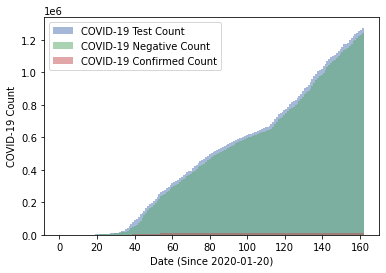

In [5]:
# COVID-19 다변수(검사 수, 음성 수, 양성 수) 히스토그램 출력

plt.style.use("seaborn-deep")
bins = time_df["test"].count()
plt.hist(time_df.index, bins=bins, weights=time_df["test"], alpha=0.5, label="COVID-19 Test Count")
plt.hist(time_df.index, bins=bins, weights=time_df["negative"], alpha=0.5, label="COVID-19 Negative Count")
plt.hist(time_df.index, bins=bins, weights=time_df["confirmed"], alpha=0.5, label="COVID-19 Confirmed Count")
plt.legend(loc="upper left")
plt.xlabel("Date (Since 2020-01-20)")
plt.ylabel("COVID-19 Count")
plt.savefig("sample")
plt.show()

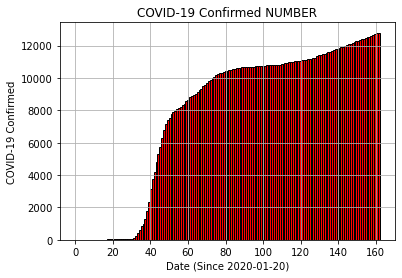

In [6]:
# COVID-19 양성 결과

plt.hist(time_df.index, bins=time_df["confirmed"].count(), weights=time_df["confirmed"], color="r", edgecolor="black")
plt.title("COVID-19 Confirmed NUMBER")
plt.xlabel("Date (Since 2020-01-20)")
plt.ylabel("COVID-19 Confirmed")
plt.grid()
plt.show()

In [7]:
# COVID-19 이동평균과 같이 그려보기
# 이동평균(Moving Average) 계산
confirmed_mv_df = pd.DataFrame(
    {
        'confirmed': time_df["confirmed"],
        'confirmed_5d': time_df["confirmed"].rolling(window=5).mean(),
        'confirmed_10d': time_df["confirmed"].rolling(window=10).mean()
    }
)

# 이동평균 결측치(NaN) 제거
confirmed_mv_df.dropna(axis=0, inplace=True)

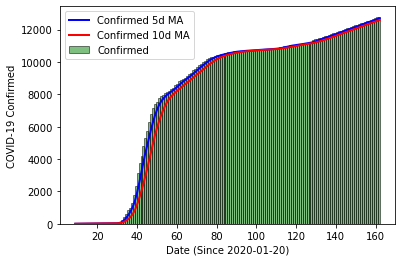

In [8]:
# 그래프 출력
num_bins = confirmed_mv_df["confirmed"].count()
plt.hist(confirmed_mv_df.index, bins=num_bins, weights=confirmed_mv_df["confirmed"], color="green", edgecolor="black", alpha=0.5, label="Confirmed")
plt.plot(confirmed_mv_df.index, confirmed_mv_df["confirmed_5d"], color="blue", linewidth=2, label="Confirmed 5d MA")
plt.plot(confirmed_mv_df.index, confirmed_mv_df["confirmed_10d"], color="red", linewidth=2, label="Confirmed 10d MA")
plt.legend(loc="upper left")
plt.xlabel("Date (Since 2020-01-20)")
plt.ylabel("COVID-19 Confirmed")
plt.show()

In [9]:
# 전일 대비 확진자 증가량 확인
confirmed_list = time_df["confirmed"].tolist()
iter_max = len(confirmed_list) - 1

increase_confirmed = list()

for idx in range(iter_max):
    previous_confirmed = confirmed_list[idx]
    current_confirmed = confirmed_list[idx + 1]
    increase_confirmed.append(current_confirmed - previous_confirmed)

In [10]:
# List to DataFrame
increase_df = pd.DataFrame(
    {
        "increase": increase_confirmed
    }
)

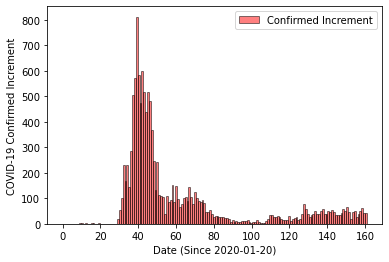

In [11]:
# 그래프 그리기
plt.hist(increase_df.index, bins=increase_df["increase"].count(), weights=increase_df["increase"], color="red", edgecolor="black", alpha=0.5, label="Confirmed Increment")
plt.legend(loc="upper left")
plt.xlabel("Date (Since 2020-01-20)")
plt.ylabel("COVID-19 Confirmed Increment")
plt.legend(loc="upper right")
plt.show()
